## Javad Ranjbar Kermani
## 400209795
## Question 3
## Dimentionality reduction and KMeans clustring

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading dataset
df = pd.read_csv('data.csv')
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
df = df.drop(['id'], axis =1) #removing id column
df.describe() #Statistical review

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [4]:
#scaling and centering the dataset
from sklearn.preprocessing import StandardScaler , MinMaxScaler
# 1) scaling with StandardScaler
#scaler1 = StandardScaler()
#X_scaled = scaler1.fit_transform(df)
#X_scaled
# 2) scaling with MinMaxScaler
scaler2 = MinMaxScaler()
X_scaled = scaler2.fit_transform(df)
X_scaled.shape

(98000, 29)

### PCA for Dimentionality reduction

In [5]:
# PCA algorthm using scikit learn libraries
from sklearn.decomposition import PCA
pca = PCA(n_components = 23).fit(X_scaled) 
explained_variance_ratio = pca.explained_variance_ratio_ #explained_variance_ratio 
#(eigenvalue of each componenet/ sum of all eigen values)
print('explained variance ratio :\n\n',explained_variance_ratio,'\n\n')
number_of_components = pca.n_components_ #number_of_components
cumulative_sum = np.cumsum(explained_variance_ratio) #cumulative sum of eigenvalue ratio
print('cumulative sum :\n\n',cumulative_sum)

explained variance ratio :

 [0.08454622 0.06116518 0.05559903 0.03991408 0.03701147 0.03618707
 0.03528071 0.03510408 0.03480951 0.03471062 0.03427706 0.03373821
 0.03309487 0.03257928 0.03223261 0.03209785 0.03204524 0.03178605
 0.03132635 0.03075406 0.03030014 0.03000977 0.02875963] 


cumulative sum :

 [0.08454622 0.14571139 0.20131042 0.2412245  0.27823597 0.31442303
 0.34970375 0.38480783 0.41961734 0.45432795 0.48860501 0.52234322
 0.5554381  0.58801738 0.62024999 0.65234784 0.68439308 0.71617913
 0.74750549 0.77825955 0.80855969 0.83856947 0.8673291 ]


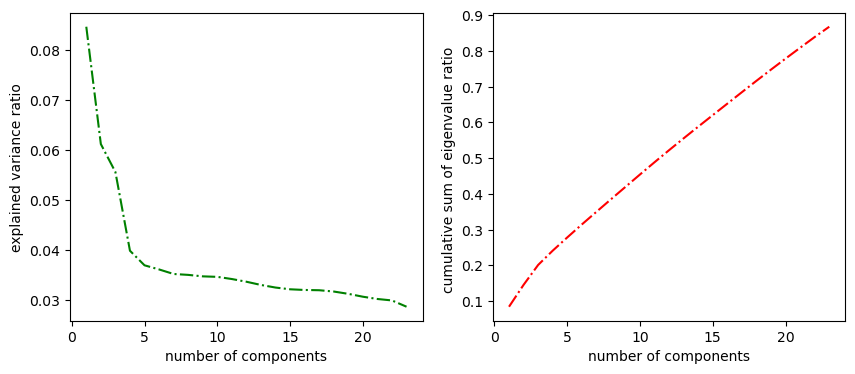

In [6]:
component_range = range(1,number_of_components+1)
plt.figure(figsize=(10,4))
# plotting explained_variance_ratio vs number_of_components 
plt.subplot(1,2,1)
plt.plot(component_range, explained_variance_ratio , color = 'green',linestyle = '-.')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
# plotting cumulative sum of eigenvalue ratio vs number_of_components 
plt.subplot(1,2,2)
plt.plot(component_range, cumulative_sum , color = 'red',linestyle = '-.')
plt.xlabel('number of components')
plt.ylabel('cumulative sum of eigenvalue ratio ')
plt.show()

In [7]:
# so 5 components is enough
pca = PCA(n_components = 23)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(98000, 23)

In [8]:
PCA_vraiance = pca.explained_variance_ratio_ #explained_variance_ratio 
number_of_components = pca.n_components_ #number of components
print('PCA_vraiance :\n\n',PCA_vraiance,'\n\n')
print('number of components :\n\n',number_of_components)

PCA_vraiance :

 [0.08454622 0.06116518 0.05559903 0.03991408 0.03701147 0.03618707
 0.03528071 0.03510408 0.03480951 0.03471062 0.03427706 0.03373821
 0.03309487 0.03257928 0.03223261 0.03209785 0.03204524 0.03178605
 0.03132635 0.03075406 0.03030014 0.03000977 0.02875963] 


number of components :

 23


### SVD for Dimentionality reduction

In [9]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=23)
X_svd = svd.fit_transform(X_scaled)

In [10]:
svd_explained_variance_ratio = svd.explained_variance_ratio_ #explained_variance_ratio 
sort = np.argsort(svd_explained_variance_ratio)[::-1] #sorting svd explained variance ratio
svd_explained_variance_ratio = svd_explained_variance_ratio[sort]
print('svd_vraiance :\n\n',svd_explained_variance_ratio,'\n\n')

svd_vraiance :

 [0.08392896 0.06116497 0.05541149 0.0398627  0.0367564  0.03594539
 0.03526699 0.03489194 0.03476138 0.03445744 0.03424215 0.03348776
 0.03263686 0.03241082 0.03221808 0.03206999 0.0319684  0.03187732
 0.03138622 0.03092018 0.03031639 0.03010366 0.02896985] 




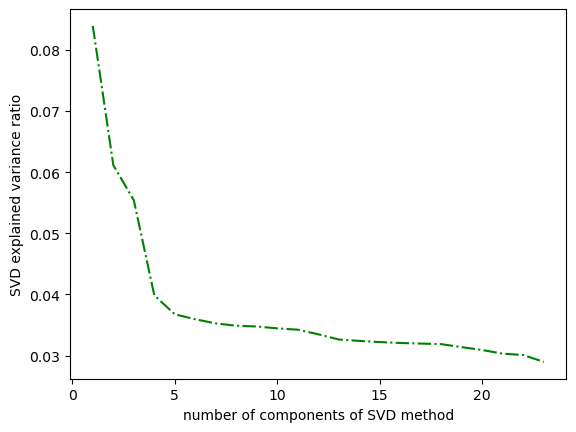

In [11]:
plt.plot(range(1,24), svd_explained_variance_ratio , color = 'green',linestyle = '-.')
plt.xlabel('number of components of SVD method')
plt.ylabel('SVD explained variance ratio')
plt.show()

### kmeans clustering

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7) #number of clusters
clusters = kmeans.fit(X_pca) #fit to dimentionality reduction dataset
kmeans.n_iter_ #number of iteration until convergence

21

In [13]:
print(kmeans.cluster_centers_) #Coordinates of cluster centers
print(kmeans.labels_) #labels of 7 different clusters

[[ 3.09698049e-01  3.30175512e-02 -2.01073477e-02 -5.41903008e-02
  -8.08334955e-03 -4.20343515e-03 -4.55590149e-02 -3.37903556e-02
   2.78671066e-02  1.96978540e-02  5.44838699e-03  1.94117527e-03
   4.61551867e-04  8.92994396e-05  7.09704322e-05  2.26156291e-03
  -9.54297320e-03 -5.97602569e-03  6.77979478e-03  2.47655951e-03
  -2.70808386e-02  1.56112458e-02  3.14665232e-03]
 [-3.19231222e-02 -1.46123558e-01 -7.63077690e-02  8.72878102e-02
  -6.33164538e-03 -5.96273845e-04 -2.94490933e-02 -2.38185613e-02
   2.23463885e-02  1.34523238e-02  2.97398636e-02  1.65338898e-03
  -4.60032466e-03 -3.28981489e-03  6.99858938e-03  1.21325701e-03
   5.28472672e-03  1.09376573e-03  3.56450646e-03 -1.09812715e-04
   8.93643291e-03 -1.20688673e-02  6.69321833e-04]
 [-6.53575582e-02 -1.23578488e-01  7.22972095e-02 -6.15846967e-02
   1.30467729e-02  7.22820174e-03  5.99345654e-02  3.77367021e-02
  -3.94267263e-02 -1.74427772e-02 -4.21120812e-02 -2.26499763e-03
  -1.02891891e-03  6.51813935e-03 -1.638

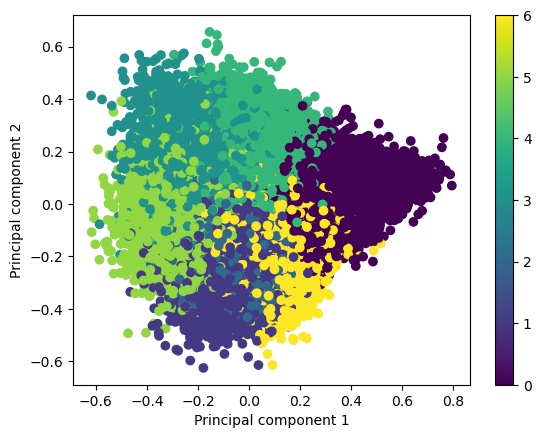

In [14]:
y = kmeans.labels_ #target of flower in iris dataset
x1 = X_pca[:,0]
x2 = X_pca[:,1]
plt.scatter(x1,x2 ,c=y )
plt.colorbar()
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

### Elbow chart

In [15]:
# elbow chart for checking the number of clusters
error = []
k_range = range(1,25)
for k in k_range :
    km = KMeans(n_clusters = k)
    km.fit(X_pca)
    error.append(km.inertia_) # Sum of squared distances of samples to their closest cluster center
error[0:5] #decreasing

[33308.723545559966,
 31296.353272635894,
 29975.984516571134,
 29061.753733510755,
 28327.477348834338]

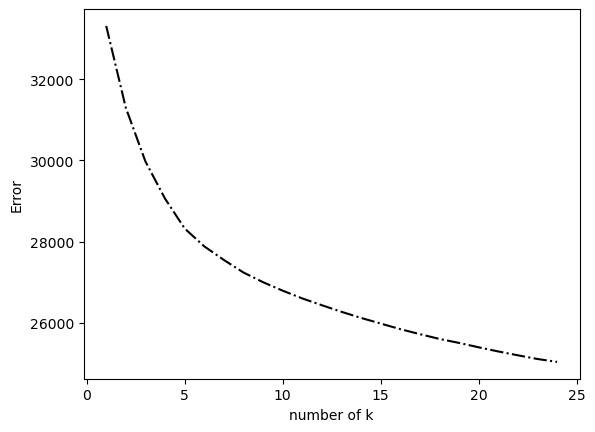

In [17]:
#plotting elbow chart
plt.plot(k_range, error, color = 'black',linestyle = '-.')
plt.xlabel('number of k')
plt.ylabel('Error')
plt.show()